# Traitement et interprétation des résultats

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.integrate import odeint
import scipy.fftpack
from scipy import signal
plt.rcParams['figure.figsize'] = [12, 3]
from scipy import optimize
import functools
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from numpy.fft import *
import scipy.signal as sig 
import scipy.stats as sta

## Récupération des données et Amortissement

poles =  [0.9]


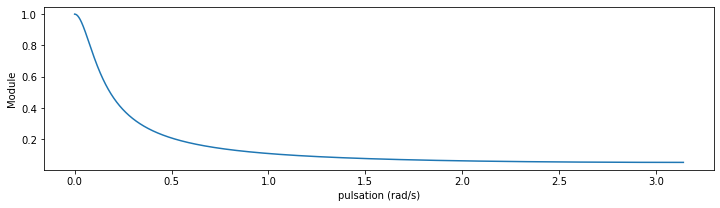

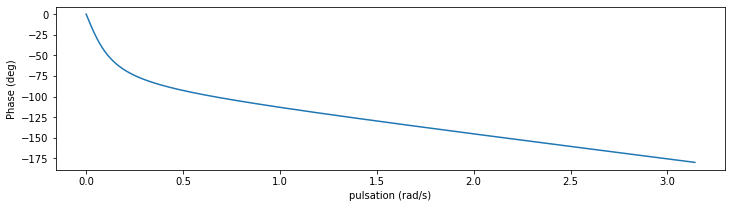

In [2]:
fe = 1000
b=np.array([0.1])  
a=np.array([1,-0.9])

tf=sig.TransferFunction(b, a, dt=1/fe)  # creation d'un filtre


print("poles = ",tf.poles)

w, H = sig.dfreqresp(tf)
module=np.abs(H)
phase=180*np.angle(H)/np.pi  # conversion radian -> degree

#affichage via matplotlib
plt.plot(w,module)
plt.ylabel("Module")
plt.xlabel("pulsation (rad/s)")

plt.figure()
plt.plot(w,phase)
plt.ylabel("Phase (deg)")
plt.xlabel("pulsation (rad/s)");


poles =  [0.9]


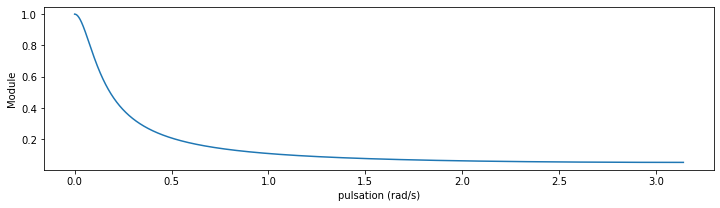

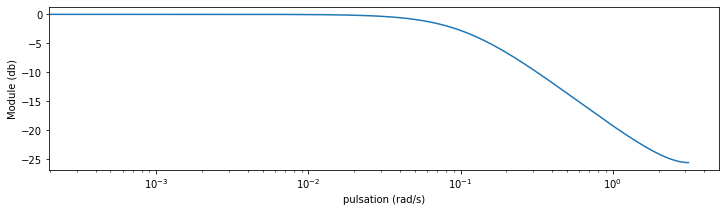

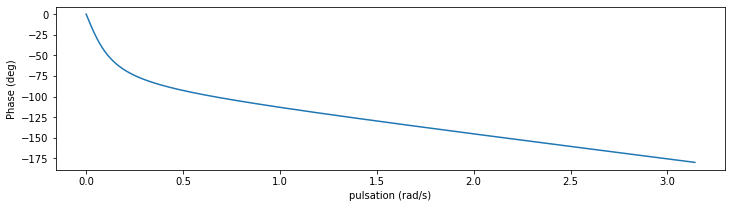

In [3]:
fe = 1000
b=np.array([0.1])  
a=np.array([1,-0.9])

tf=sig.TransferFunction(b, a, dt=1/fe)  # creation d'un filtre


print("poles = ",tf.poles)

w, H = sig.dfreqresp(tf)
module=np.abs(H)
phase=180*np.angle(H)/np.pi  # conversion radian -> degree

#affichage via matplotlib
plt.plot(w,module)
plt.ylabel("Module")
plt.xlabel("pulsation (rad/s)")

plt.figure()
plt.semilogx(w,20*np.log10(module))
plt.ylabel("Module (db)")
plt.xlabel("pulsation (rad/s)");

plt.figure()
plt.plot(w,phase)
plt.ylabel("Phase (deg)")
plt.xlabel("pulsation (rad/s)");

regression =  -0.1563358884288137  * x +  5.246271241619648
ksi =  0.005238237773917631


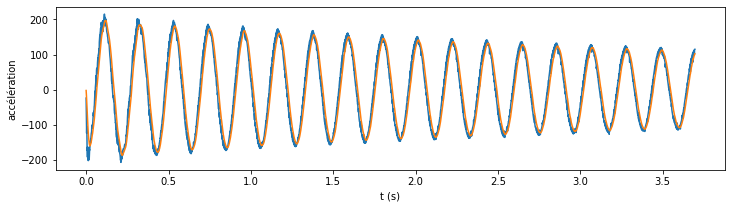

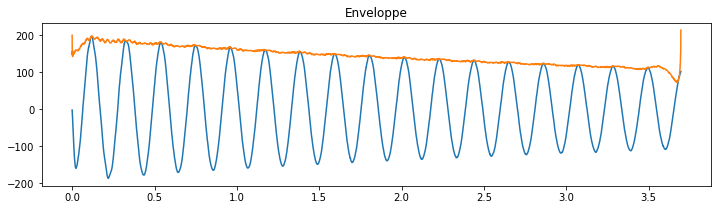

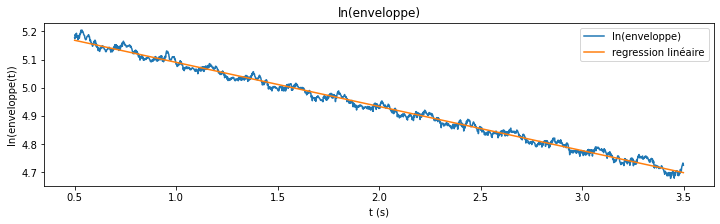

In [4]:
#ouverture du fichier
dataFile = open("Data_no_motor-regime libre.txt")
lines = dataFile.readlines()

#init des listes de temps et d'accélérations
tt = np.zeros(len(lines))
aa = np.zeros(len(lines))

#on construit les listes 
for i in range(len(lines)):
    data = lines[i].split(',')
    tt[i] = data[0]
    aa[i] = data[1]
    
#print("tt = ",tt)
#print("aa = ",aa)
tto = tt[0]
tt -= tto
tt /= 2

tt = np.arange(len(lines))/fe
aa = aa - np.mean(aa)

#affichage
plt.figure();
plt.plot(tt,aa);
plt.xlabel("t (s)");
plt.ylabel("accélération");


y=sig.lfilter(b,a,aa)
plt.plot(tt,y,'-')
maxValue = max(y)
idxMax = y.tolist().index(maxValue)
tMax = tt[idxMax]
#print(idxMax)
plt.figure()
y = y-np.mean(y)
enveloppe = np.abs(sig.hilbert(y))
plt.plot(tt,y)
plt.plot(tt,enveloppe,'-')
plt.title("Enveloppe")

#On traite l'enveloppe:
lnEnveloppe = np.log(enveloppe)
lnEnveloppeCoupee = lnEnveloppe[int(0.5*fe):int(3.5*fe)]
plt.figure()
plt.title("ln(enveloppe)")
plt.xlabel("t (s)")
plt.ylabel("ln(enveloppe(t))")
ttenveloppe = tt[int(0.5*fe):int(3.5*fe)]
plt.plot(ttenveloppe,lnEnveloppeCoupee,label="ln(enveloppe)")

#régression linéaire
lr = sta.linregress(ttenveloppe, lnEnveloppeCoupee)
pente = lr[0]
origine = lr[1]

def regression(x):
    return pente * x + origine

reg = regression(ttenveloppe)
plt.plot(ttenveloppe, reg,label="regression linéaire")
plt.legend()

#on prend 2 points:
print("regression = " ,pente, " * x + ",origine)

wo = 2*np.pi*4.75  #fo = 4.75 Hz, cf plus bas
ksi = -pente/wo
print("ksi = ", ksi)

## Etude fréquentielle

(0.0, 200.0)

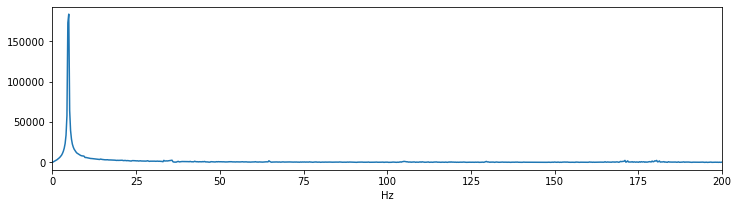

In [5]:
#affichage des fréquences
AA = fft(aa)
#plt.plot(abs(AA))
plt.xlabel("Hz")
N = len(aa)
k = np.arange(0,N,1)
Te = 1/fe
deltaF = 1/N/Te
freq = k*deltaF
freq_shift = freq-1/Te/2
A2 = fftshift(AA)
plt.plot(freq_shift, abs(A2))

plt.xlim(0,200)